In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [23]:
metrics = pd.read_csv('/home/wvillegas/DLProjects/DetectionModels/validation_metrics/valid3FCMN8adam_lr0.0001_decay0_ep35.csv')
radius_data = pd.read_csv('/home/wvillegas/dataset-mask/single_instance_dataset_wradius.csv')

In [24]:
threshold_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [25]:
th_list = []
for th in threshold_list:
    th_list.append(metrics.loc[metrics['threshold'] == th])
    

0.47135249111944166
1.3304923075233563
0.25577690202536363
0.5589812722644156
0.24838358411328942
0.56291677598461
0.24449031452669548
0.5678715228182036
0.24244015576930805
0.58350382252182
0.24327513814664856
0.6130052230642112
0.24795613718207876
0.6605672759726251
0.22693069909206082
0.6407381578883313
0.23375303877416997
0.7271167373517632


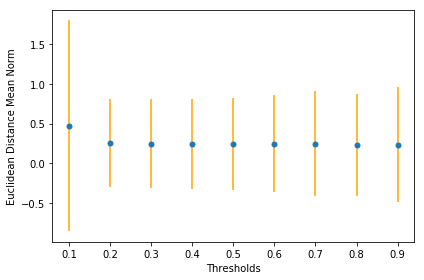

In [26]:
Y = []
acumList = []
yerr = []
for i in np.arange(0,len(threshold_list)):
    acumList = []
    for j in np.arange(th_list[i].shape[0]):
        row = radius_data.loc[radius_data['imageOrigin'] == th_list[i]['sample'].values[j]]
        if math.isnan(th_list[i]['euclidean_distance'].values[j]):
            continue
        acumList.append(th_list[i]['euclidean_distance'].values[j] / (row['diam_resize'].values[0]))
    mean = (np.mean(acumList))
    std = np.std(acumList)
    print(mean)
    print(std)
    Y.append(mean)
    yerr.append(std)
# for i in np.arange(0,len(threshold_list)):
#     yerr.append(th_list[i]['euclidean_distance'].std())
plt.errorbar(threshold_list, Y,yerr=yerr, linestyle='None', marker='.', ecolor='orange',markersize=10)
plt.xlabel('Thresholds')
plt.ylabel('Euclidean Distance Mean Norm')
plt.tight_layout()

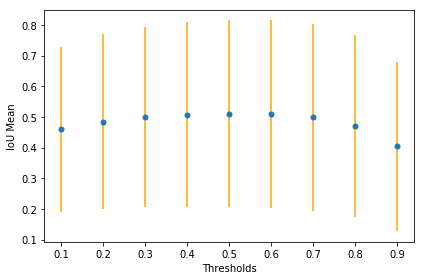

In [69]:
Y = []
for i in np.arange(0,len(threshold_list)):
    Y.append(th_list[i]['iou'].mean())
yerr = []
for i in np.arange(0,len(threshold_list)):
    yerr.append(th_list[i]['iou'].std())
plt.errorbar(threshold_list, Y, yerr, linestyle='None', marker='.', ecolor='orange',markersize=10)
plt.xlabel('Thresholds')
plt.ylabel('IoU Mean')
plt.tight_layout()

In [58]:
np.mean(np.nan_to_num((th_list[5]['intersection'].values / th_list[5]['segmentation_area'].values)))
np.std(np.nan_to_num((th_list[5]['intersection'].values / th_list[5]['segmentation_area'].values)))

/home/wvillegas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/wvillegas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


0.343371362232348

/home/wvillegas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/wvillegas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


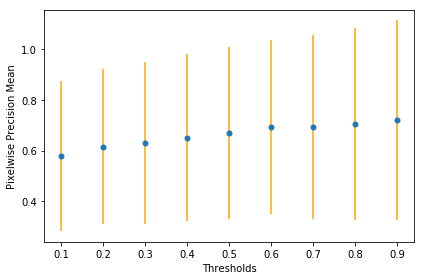

In [61]:
Y = []
for i in np.arange(0,len(threshold_list)):
    Y.append(np.mean(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['segmentation_area'].values))))
yerr = []
for i in np.arange(0,len(threshold_list)):
    yerr.append(np.std(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['segmentation_area'].values))))
plt.errorbar(threshold_list, Y, yerr, linestyle='None', marker='.', ecolor='orange',markersize=10)
plt.xlabel('Thresholds')
plt.ylabel('Pixelwise Precision Mean')
plt.tight_layout()

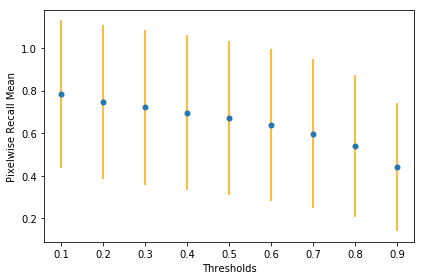

In [62]:
Y = []
for i in np.arange(0,len(threshold_list)):
    Y.append(np.mean(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['gt_area'].values))))
yerr = []
for i in np.arange(0,len(threshold_list)):
    yerr.append(np.std(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['gt_area'].values))))
plt.errorbar(threshold_list, Y, yerr, linestyle='None', marker='.', ecolor='orange',markersize=10)
plt.xlabel('Thresholds')
plt.ylabel('Pixelwise Recall Mean')
plt.tight_layout()

Diagrama de barras para iou prec y rec a c/th

/home/wvillegas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/wvillegas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


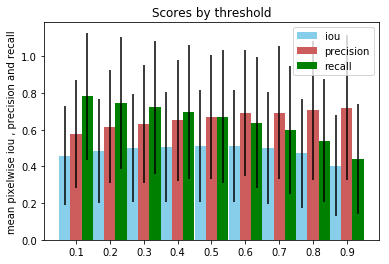

In [69]:
iou = []
for i in np.arange(0,len(threshold_list)):
    iou.append(th_list[i]['iou'].mean())
iouerr = []
for i in np.arange(0,len(threshold_list)):
    iouerr.append(th_list[i]['iou'].std())
prec = []
for i in np.arange(0,len(threshold_list)):
    prec.append(np.mean(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['segmentation_area'].values))))
precerr = []
for i in np.arange(0,len(threshold_list)):
    precerr.append(np.std(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['segmentation_area'].values))))
rec = []
for i in np.arange(0,len(threshold_list)):
    rec.append(np.mean(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['gt_area'].values))))
recerr = []
for i in np.arange(0,len(threshold_list)):
    recerr.append(np.std(np.nan_to_num((th_list[i]['intersection'].values / th_list[i]['gt_area'].values))))

    
ind = np.arange(len(threshold_list))  # the x locations for the groups
width = 0.33  # the width of the bars

fig, ax = plt.subplots()
ioubar = ax.bar(ind - width, iou, width, yerr=iouerr,
                color='SkyBlue', label='iou')
precbar = ax.bar(ind , prec, width, yerr=precerr,
                color='IndianRed', label='precision')
recbar = ax.bar(ind + width, rec, width, yerr=recerr,
                color='green', label='recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mean pixelwise iou , precision and recall')
ax.set_title('Scores by threshold')
ax.set_xticks(ind)
ax.set_xticklabels(threshold_list)
ax.legend()


In [96]:
distance_threshold_list = [25,50,75,100,125,150]

Text(0,0.5,'Recall')

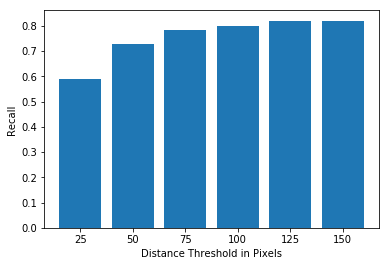

In [119]:
bud_recall = []
bud_precision = []
for j in np.arange(0,len(distance_threshold_list)):
    s = th_list[4]['euclidean_distance']
    s = s.where(s<distance_threshold_list[j], False)
    s = s.where(s == False, True)
    bud_recall.append(s.sum()/139)
plt.bar(x=np.arange(0,len(distance_threshold_list)),height=bud_recall,tick_label=distance_threshold_list)
plt.xlabel('Distance Threshold in Pixels')
plt.ylabel('Recall')

Calculo de diametros de yema para imagenes reescaladas a 2048x2048  
- Buscamos el nombre de el parche yema en cada nombre de mascara del single_instance_corpus
- Cargamos el csv llamado corpus-26000.csv donde esta la info detallada de cada patch yema
- buscamos el patch de yema correspondiente a la mascara y guardamos su x e ycenter (originales) 
- 
- leemos el tamaño original de la imagen a la que pertenece y calculamos la razon de escala para la dimension sobre la que se tomo el diametro.
- luego multiplicamos ese diametro por la razon de escala calculada
- para calcular el centro de masa leemos la mascara reescalada y le aplicamos el preprocessing para volverla binaria
- usamos la funcion mass_center para calcular el centro de masa para ground truth reescalado

In [17]:
import pandas as pd
import re
import cv2
from skimage.io import imread
import os
import numpy as np
single_instance_corpus = pd.read_csv('/home/wvillegas/dataset-mask/single_instance_corpus.csv')
corpus_26000 = pd.read_csv('/home/wvillegas/corpus-26000.csv')
fullres_path = '/home/wvillegas/dataset-mask/images'
resize_path = '/home/wvillegas/dataset-mask/dataset_resize/masks_resize'
patch_path = '/Backup/sperez/vise/data/images/corpus-26000/'

In [15]:
def mass_center(mask):
    #calculate mass center from top-left corner
    x_by_mass = 0
    y_by_mass = 0
    total_mass = np.sum(mask)
    for x in np.arange(0,mask.shape[0]):
        x_by_mass += np.sum(x * mask[:,x])
        y_by_mass += np.sum(x * mask[x,:])

    return((np.floor(x_by_mass/total_mass), np.floor(y_by_mass/total_mass)))

In [18]:
dict_new_dataset = {'imageOrigin':single_instance_corpus['imageOrigin'].values,
                         'mask':[],
                         'patch_name':[],
                         'x_center_orig':[],
                          'y_center_orig':[],
                          'x_center_resize':[],
                          'y_center_resize':[],
                          'diam_orig':[],
                          'diam_resize':[]
                         }
for mask in single_instance_corpus['mask'].values:
    #buscamos el nombre del patch yema dentro del nombre de la mascara
    result = re.search(r'_[0-9]+_', mask)
    patch_name = result.group().replace("_", "") + '.jpg'
    dict_new_dataset['mask'].append(mask)
    dict_new_dataset['patch_name'].append(patch_name)
    #buscamos la fila del csv que contiene la info de ese patch yema
    patch_row = corpus_26000.loc[corpus_26000['imageName'] == patch_name]
    #guardamos el x e y center de esa yema original
    dict_new_dataset['x_center_orig'].append(patch_row['xBudCenter'].values[0])
    dict_new_dataset['y_center_orig'].append(patch_row['yBudCenter'].values[0])
    
    #sacar razones de rescale leyendo la imagen original que contiene a ese patch
    fullres_shape = cv2.imread(os.path.join(fullres_path, patch_row['imageOrigin'].values[0])).shape
    x_ratio = 2048/fullres_shape[0]
    y_ratio = 2048/fullres_shape[1]
    
    #diametro original
    diam_orig = cv2.imread(os.path.join(patch_path, patch_row['imageName'].values[0])).shape
    diam_resize = 0
    #buscamos la dimension mas grande, la guardamos y tambien calculamos su resize segun sea x o y
    if (diam_orig[0] > diam_orig[1]): # si el diametro es en x
        diam_resize = diam_orig[0] * x_ratio
        diam_orig = diam_orig[0]
    elif (diam_orig[0] < diam_orig[1]): # si el diametro es en y
        # se debe reescalar por y
        diam_resize = diam_orig[1] * y_ratio
        diam_orig = diam_orig[1]
    elif (diam_orig[0] == diam_orig[1]): # si el diametro es igual en ambos
        #se debe escalar por el ratio mas grande
        diam_resize = diam_orig[0] * max((x_ratio,y_ratio))
        diam_orig = diam_orig[0]
    #guardamos los valores en el diccionario
    dict_new_dataset['diam_orig'].append(diam_orig)
    dict_new_dataset['diam_resize'].append(diam_resize)
    
    #leemos la mascara 
    resized_mask = cv2.imread(os.path.join(resize_path, 'mask_'+ re.search(r'^[0-9]+_', mask).group().replace("_", "") + '.png'))
    #preprocesamos
    resized_mask = cv2.cvtColor(resized_mask, cv2.COLOR_BGR2GRAY)
    resized_mask = resized_mask.astype(bool).astype(int)
    center_resize = mass_center(resized_mask)
    dict_new_dataset['x_center_resize'].append(center_resize[0])
    dict_new_dataset['y_center_resize'].append(center_resize[1])
new_single_dataset = pd.DataFrame(dict_new_dataset)

In [19]:
new_single_dataset.to_csv('/home/wvillegas/dataset-mask/single_instance_dataset_wradius.csv')

In [21]:
new_single_dataset.describe()

,x_center_orig,y_center_orig,x_center_resize,y_center_resize,diam_orig,diam_resize
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,2461.551576,1744.981375,1021.568768,1036.366762,469.785100,247.287658
std,401.465923,256.525842,97.013786,111.359334,320.558555,162.381768
min,1228.000000,700.000000,665.000000,415.000000,78.000000,31.614458
25%,2277.000000,1574.000000,966.000000,977.250000,252.250000,131.415205
50%,2559.500000,1763.000000,1023.000000,1036.500000,357.500000,202.195448
75%,2740.000000,1907.000000,1079.500000,1091.000000,536.000000,306.377510
max,3480.000000,2552.000000,1309.000000,1434.000000,1716.000000,963.368421
